In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import plotly.express as px
!pip install joypy
import joypy
!pip install squarify
import squarify




In [32]:
data = pd.read_csv(r'C:\Users\borys\IronHack\Streamlit_Python\trials2.csv')

data.head()

,Year,Decade,Century,Tried,Deaths,City_old,City,Region,Country,lon,lat,record.source,Part of Europe
0,NaN,1520,1500,1,1.0,NaN,NaN,NaN,Estonia,NaN,NaN,Madar (1990),Scandinavia
1,NaN,1530,1500,1,1.0,NaN,NaN,NaN,Estonia,NaN,NaN,Madar (1990),Scandinavia
2,NaN,1540,1500,5,5.0,NaN,NaN,NaN,Estonia,NaN,NaN,Madar (1990),Scandinavia
3,NaN,1580,1500,7,5.0,NaN,NaN,NaN,Estonia,NaN,NaN,Madar (1990),Scandinavia
4,NaN,1590,1500,11,0.0,NaN,NaN,NaN,Estonia,NaN,NaN,Madar (1990),Scandinavia


In [33]:
data.describe

<bound method NDFrame.describe of          Year  Decade  Century  Tried  Deaths City_old City   Region  Country  \
0         NaN    1520     1500      1     1.0      NaN  NaN      NaN  Estonia   
1         NaN    1530     1500      1     1.0      NaN  NaN      NaN  Estonia   
2         NaN    1540     1500      5     5.0      NaN  NaN      NaN  Estonia   
3         NaN    1580     1500      7     5.0      NaN  NaN      NaN  Estonia   
4         NaN    1590     1500     11     0.0      NaN  NaN      NaN  Estonia   
...       ...     ...      ...    ...     ...      ...  ...      ...      ...   
10935  1740.0    1740     1700      2     0.0      NaN  NaN  Sachsen  Germany   
10936  1750.0    1750     1700      1     0.0      NaN  NaN  Sachsen  Germany   
10937  1760.0    1760     1700      4     0.0      NaN  NaN  Sachsen  Germany   
10938  1770.0    1770     1700      6     0.0      NaN  NaN  Sachsen  Germany   
10939  1790.0    1790     1700      1     0.0      NaN  NaN  Sachsen  Germa

In [34]:
#We want to know if there are any duplicates
#data2 = data.groupby(data.columns.tolist(),as_index=False).size()

len(data)-len(data.drop_duplicates())

3884

In [35]:
#We want to drop 3884 duplicated rows
data2 = data.drop_duplicates()
data2.shape


(7056, 13)

In [36]:
#Checkpoint
data3 = data2

In [37]:
#We are dropping columns we don't need

data4 = data3.drop(labels=['Year', 'record.source'], axis=1)

data4

,Decade,Century,Tried,Deaths,City_old,City,Region,Country,lon,lat,Part of Europe
0,1520,1500,1,1.0,NaN,NaN,NaN,Estonia,NaN,NaN,Scandinavia
1,1530,1500,1,1.0,NaN,NaN,NaN,Estonia,NaN,NaN,Scandinavia
2,1540,1500,5,5.0,NaN,NaN,NaN,Estonia,NaN,NaN,Scandinavia
3,1580,1500,7,5.0,NaN,NaN,NaN,Estonia,NaN,NaN,Scandinavia
4,1590,1500,11,0.0,NaN,NaN,NaN,Estonia,NaN,NaN,Scandinavia
...,...,...,...,...,...,...,...,...,...,...,...
10935,1740,1700,2,0.0,NaN,NaN,Sachsen,Germany,NaN,NaN,Western Europe
10936,1750,1700,1,0.0,NaN,NaN,Sachsen,Germany,NaN,NaN,Western Europe
10937,1760,1700,4,0.0,NaN,NaN,Sachsen,Germany,NaN,NaN,Western Europe
10938,1770,1700,6,0.0,NaN,NaN,Sachsen,Germany,NaN,NaN,Western Europe


In [38]:
data4["Deaths"] = data4["Deaths"].fillna(0)
data4["Region"] = data4["Region"].fillna('Unknown')
data4.head()

,Decade,Century,Tried,Deaths,City_old,City,Region,Country,lon,lat,Part of Europe
0,1520,1500,1,1.0,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
1,1530,1500,1,1.0,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
2,1540,1500,5,5.0,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
3,1580,1500,7,5.0,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
4,1590,1500,11,0.0,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia


In [39]:
print(data4.dtypes)

Decade              int64
Century             int64
Tried               int64
Deaths            float64
City_old           object
City               object
Region             object
Country            object
lon               float64
lat               float64
Part of Europe     object
dtype: object


In [40]:
#Changing type of data for Deaths column

data4['Deaths'] = data4['Deaths'].astype(int)

data4.head()

,Decade,Century,Tried,Deaths,City_old,City,Region,Country,lon,lat,Part of Europe
0,1520,1500,1,1,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
1,1530,1500,1,1,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
2,1540,1500,5,5,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
3,1580,1500,7,5,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia
4,1590,1500,11,0,NaN,NaN,Unknown,Estonia,NaN,NaN,Scandinavia


In [11]:
#Safety check - I want to download the dataframe to see if data are as I was expecting them - after transformations
data4.to_csv(r'C:\Users\borys\IronHack\Streamlit_Python\witch_clean.csv', index=False)

In [48]:
#Creating data for map presentation using coordinates

data_map = data4.dropna(subset = ['lon','lat'])

data_map2 = data_map.drop(labels=['Decade', 'Century','Tried','Deaths','City_old','City','Region','Country','Part of Europe'], axis=1)

data_map2

data_map2.reset_index()

#data_map2['lon'].astype(int)
#data_map2['lat'].astype(int)

print(data_map2.dtypes)



lon    float64
lat    float64
dtype: object


In [50]:
data4.groupby('Country')[['Tried','Deaths']].sum()

,Tried,Deaths
Country,,
Austria,83,13
Belgium,710,272
Czech Republic,2,0
Denmark,57,0
Estonia,205,65
Finland,710,115
France,4019,1580
Germany,16026,6851
Hungary,1644,474


In [ ]:
data_map2.to_csv(r'C:\Users\borys\IronHack\Streamlit_Python\data_map2.csv', index=False)

In [19]:
#checkpoint -> we create data that will be used for visualisations :)
viz = data4

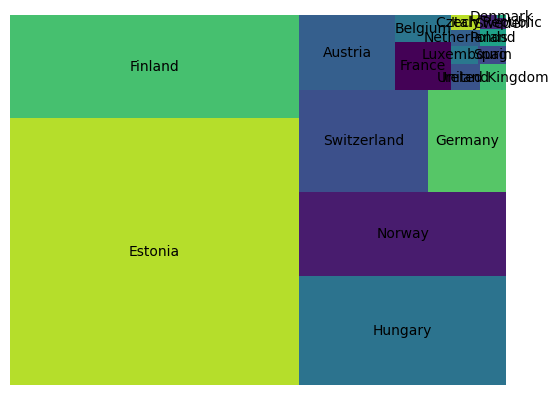

In [20]:
squarify.plot(sizes=data4['Country'].value_counts(), label=data4['Country'].unique())
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = 10
plt.rcParams['text.color'] = 'white'

plt.axis('off')
plt.show()

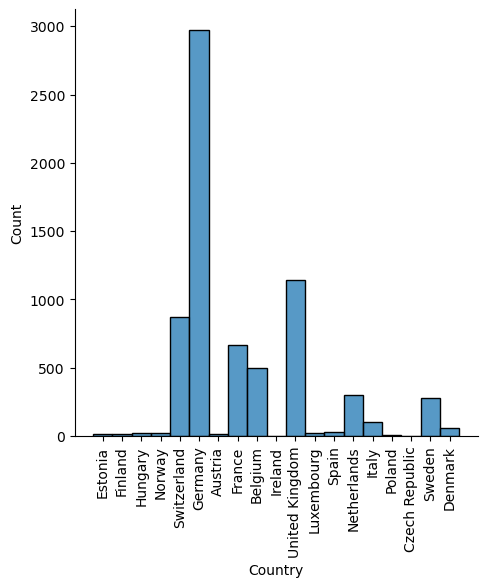

In [21]:
sns.displot(data=data4, x="Country")
plt.xticks(rotation=90)
plt.rcParams['font.size'] = 15


<AxesSubplot:xlabel='Country'>

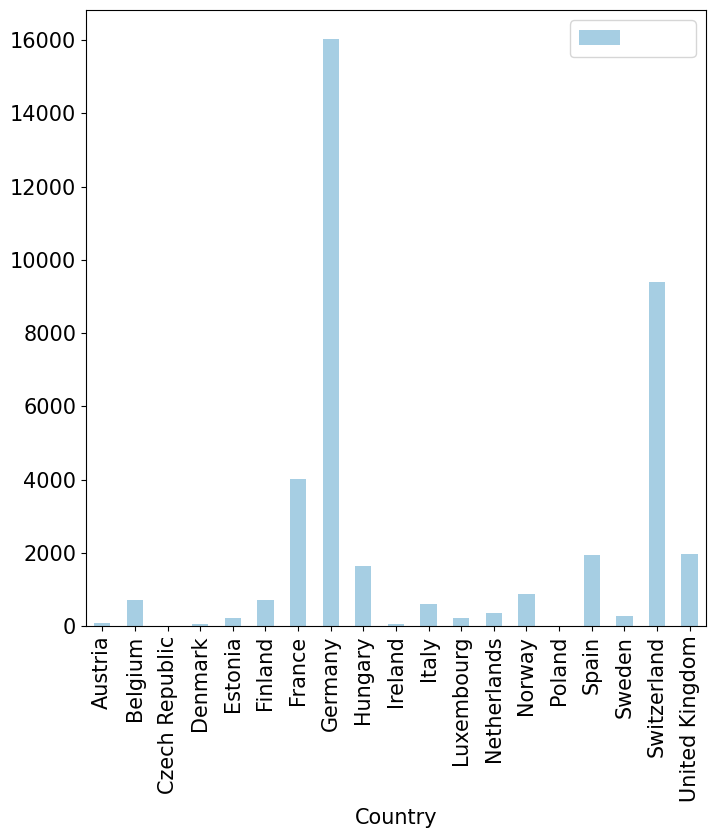

In [22]:
#define Seaborn color palette to use
colors = sns.color_palette("Paired")

graph = data4[["Country", "Tried"]].groupby(["Country"]).agg("sum")
graph.plot.bar(color=colors, label = 'Deaths')

<AxesSubplot:xlabel='Part of Europe'>

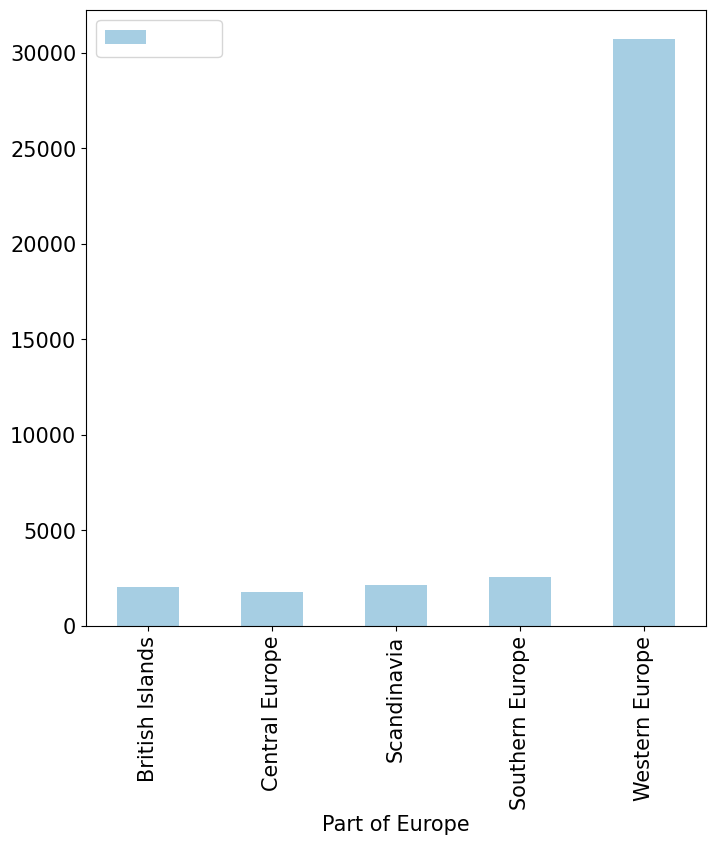

In [23]:
#define Seaborn color palette to use
colors = sns.color_palette("Paired")

graph = data4[["Part of Europe", "Tried"]].groupby(["Part of Europe"]).agg("sum")
graph.plot.bar(color=colors, label = 'Deaths')

<AxesSubplot:xlabel='Part of Europe'>

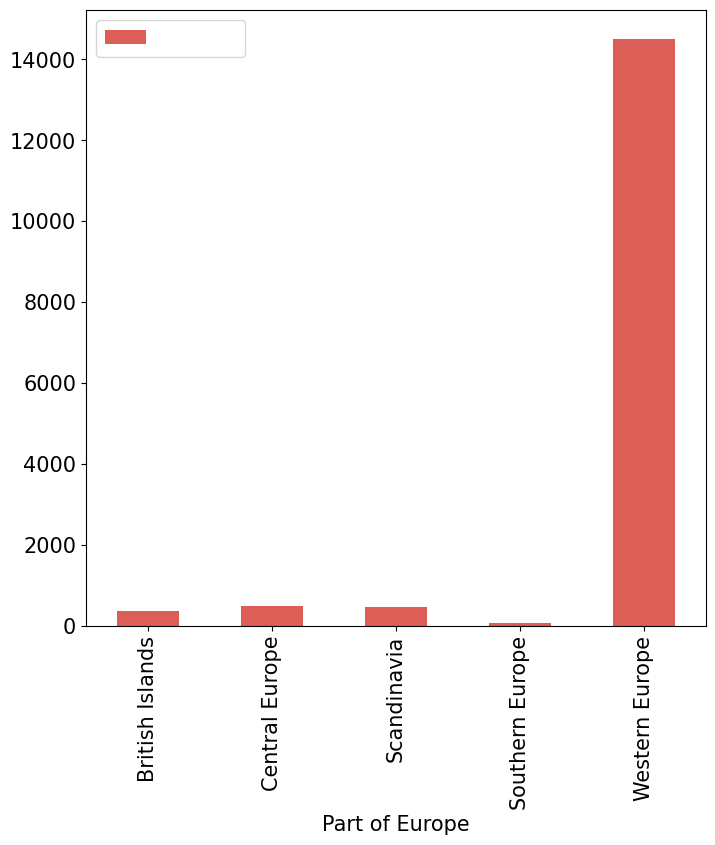

In [24]:
#define Seaborn color palette to use
colors = sns.color_palette("hls", 8)
graph = data4[["Part of Europe", "Deaths"]].groupby(["Part of Europe"]).agg("sum")
graph.plot.bar(color=colors, label = 'Deaths')

<AxesSubplot:xlabel='Country'>

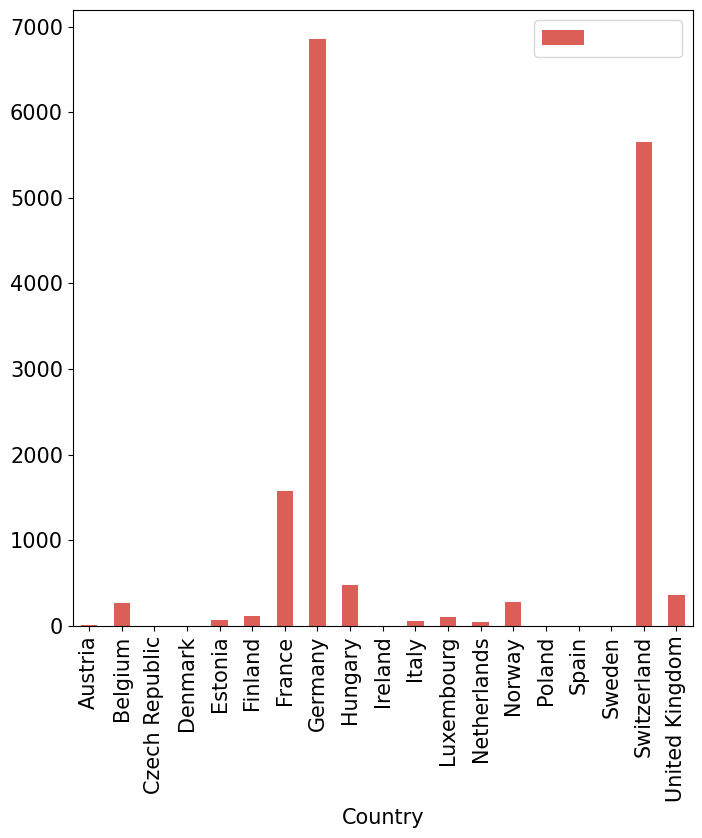

In [25]:
#define Seaborn color palette to use
colors = sns.color_palette("hls", 8)
graph = data4[["Country", "Deaths"]].groupby(["Country"]).agg("sum")
graph.plot.bar(color=colors, label = 'Deaths')

<AxesSubplot:xlabel='Century'>

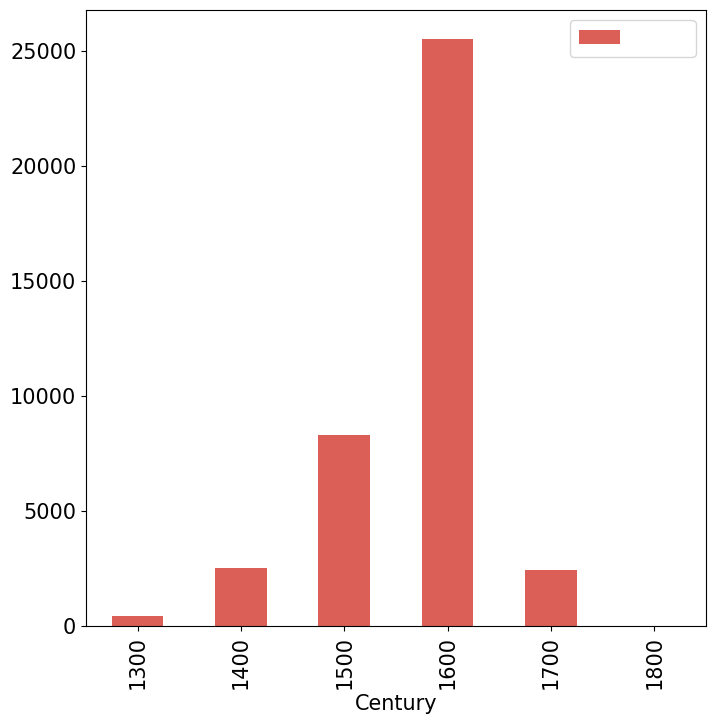

In [26]:
#define Seaborn color palette to use
colors = sns.color_palette("hls", 8)
graph = data4[["Century", "Tried"]].groupby(["Century"]).agg("sum")
graph.plot.bar(color=colors, label = 'Deaths')

<AxesSubplot:xlabel='Century'>

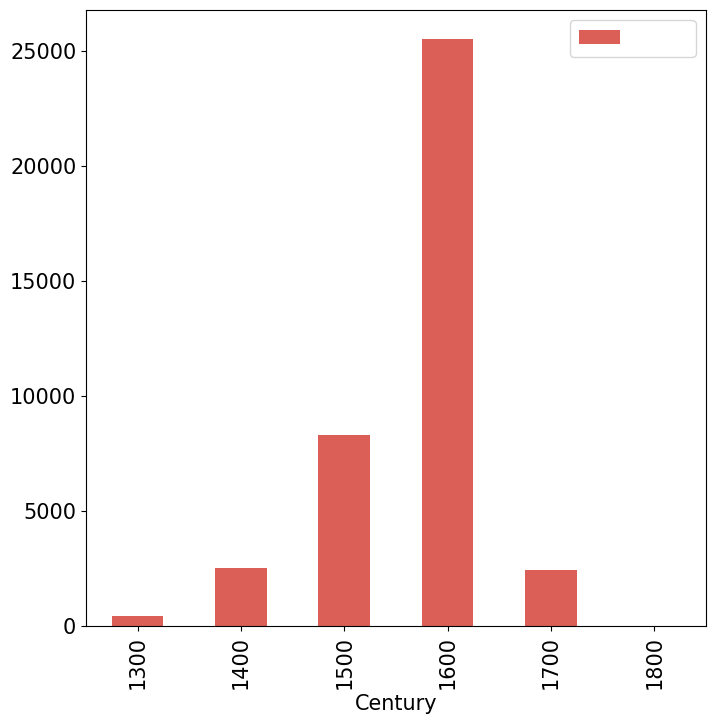

In [27]:
#define Seaborn color palette to use
colors = sns.color_palette("hls", 8)
graph = data4[["Century", "Tried"]].groupby(["Century"]).agg("sum")
graph.plot.bar(color=colors, label = 'Tried')

<AxesSubplot:xlabel='Century'>

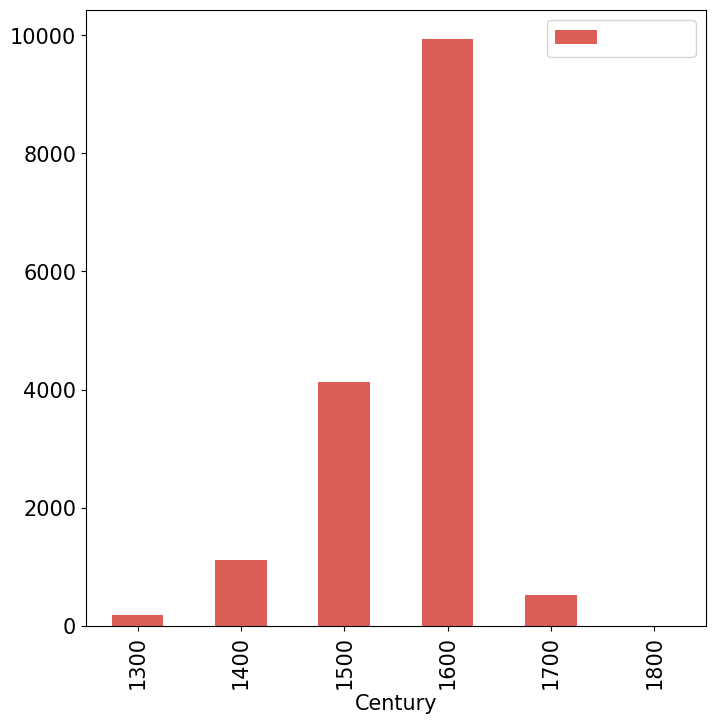

In [28]:
#define Seaborn color palette to use
colors = sns.color_palette("hls", 8)

graph = data4[["Century", "Deaths"]].groupby(["Century"]).agg("sum")
graph.plot.bar(color=colors, label = 'Deaths')

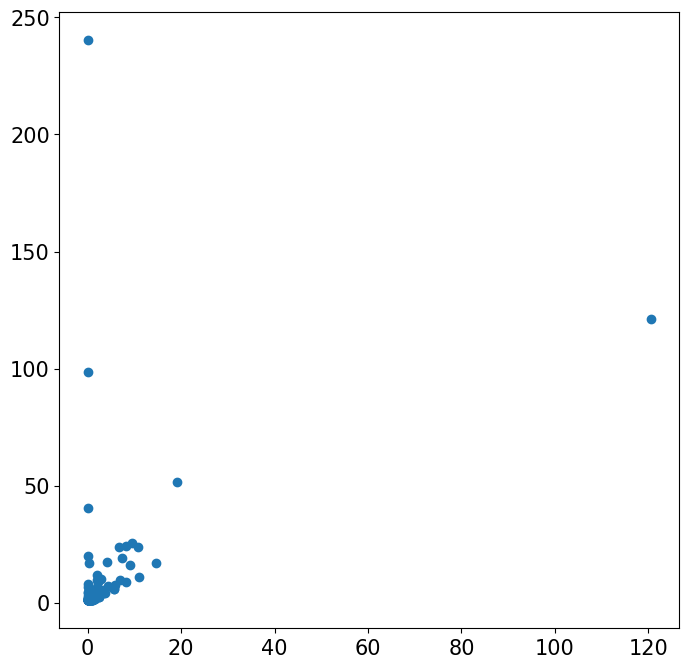

In [29]:
x = data4[['Deaths', 'Region']].groupby(['Region']).agg('mean')
y = data4[['Tried', 'Region']].groupby(['Region']).agg('mean')

plt.scatter(x, y)
plt.show()

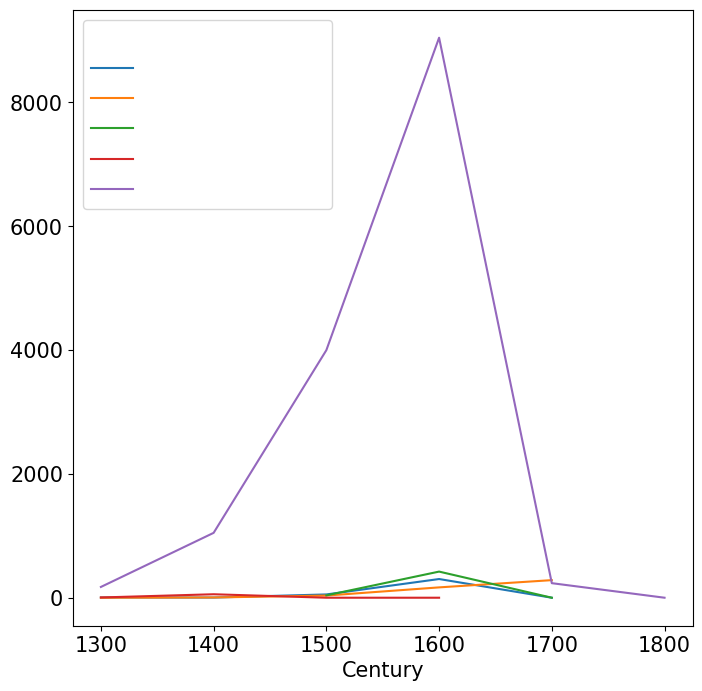

In [30]:
graph2 = data4.groupby(['Century','Part of Europe'])['Deaths'].sum()
graph2 = graph2.unstack(level='Part of Europe')
colors = sns.color_palette("husl", 8)
graph2.columns.name = 'Deaths'
graph2.plot()
label = 'Damian'

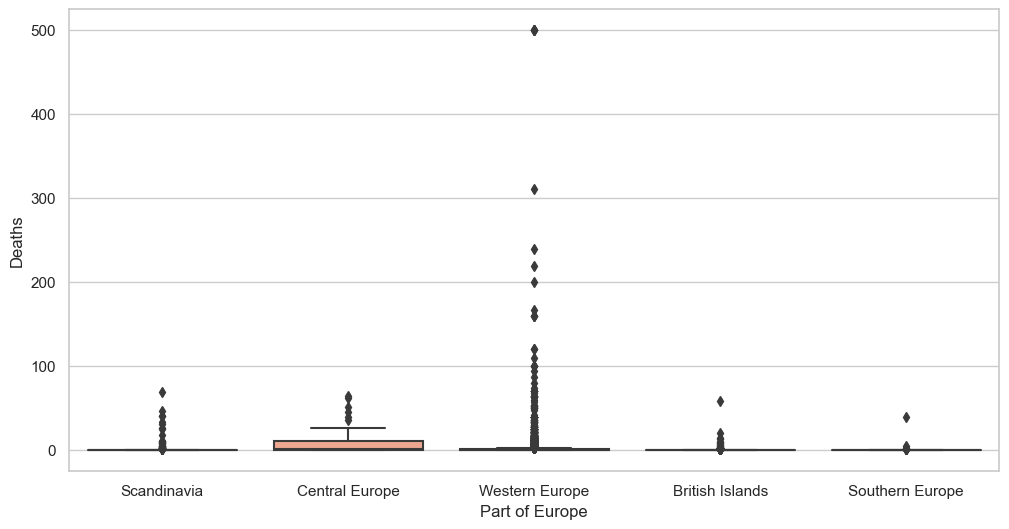

In [31]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_theme(style='whitegrid')
sns.set_palette("Reds")
ax = sns.boxplot(x='Part of Europe', y='Deaths', data=data4, palette='Reds')

Text(0.5, 1.0, 'Deaths per Country')

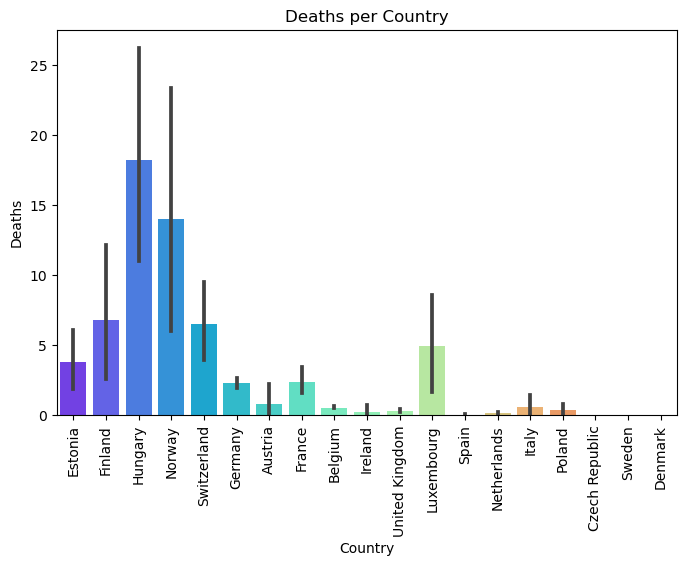

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='Country',y='Deaths',data=data4, palette='rainbow')
plt.xticks(rotation = 90)
plt.title("Deaths per Country")

15874